IMPORTS

In [130]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sb
import matplotlib.pyplot as matplt

LOADING DATASET

In [81]:
births_dataset = pd.read_csv("baby.csv")
births_dataset_indexcol_removed = births_dataset.iloc[: , 1:]

Exploring Dataset

In [82]:
births_dataset.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [83]:
print(f"Shape: {births_dataset.shape} \n")

Shape: (1174, 7) 



In [85]:
print(f"Datatypes: \n\n{births_dataset.dtypes}")

Datatypes: 

Unnamed: 0                   int64
Birth.Weight                 int64
Gestational.Days             int64
Maternal.Age                 int64
Maternal.Height              int64
Maternal.Pregnancy.Weight    int64
Maternal.Smoker               bool
dtype: object


In [86]:
births_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [87]:
births_dataset.describe

<bound method NDFrame.describe of       Unnamed: 0  Birth.Weight  Gestational.Days  Maternal.Age  \
0              1           120               284            27   
1              2           113               282            33   
2              3           128               279            28   
3              4           108               282            23   
4              5           136               286            25   
...          ...           ...               ...           ...   
1169        1170           113               275            27   
1170        1171           128               265            24   
1171        1172           130               291            30   
1172        1173           125               281            21   
1173        1174           117               297            38   

      Maternal.Height  Maternal.Pregnancy.Weight  Maternal.Smoker  
0                  62                        100            False  
1                  64                

In [91]:
print("Null Values for each column:\n")

for col in births_dataset_indexcol_removed:
    print(f"{col} -> { births_dataset[col].isna().sum()} ")

Null Values for each column:

Birth.Weight -> 0 
Gestational.Days -> 0 
Maternal.Age -> 0 
Maternal.Height -> 0 
Maternal.Pregnancy.Weight -> 0 
Maternal.Smoker -> 0 


<Axes: >

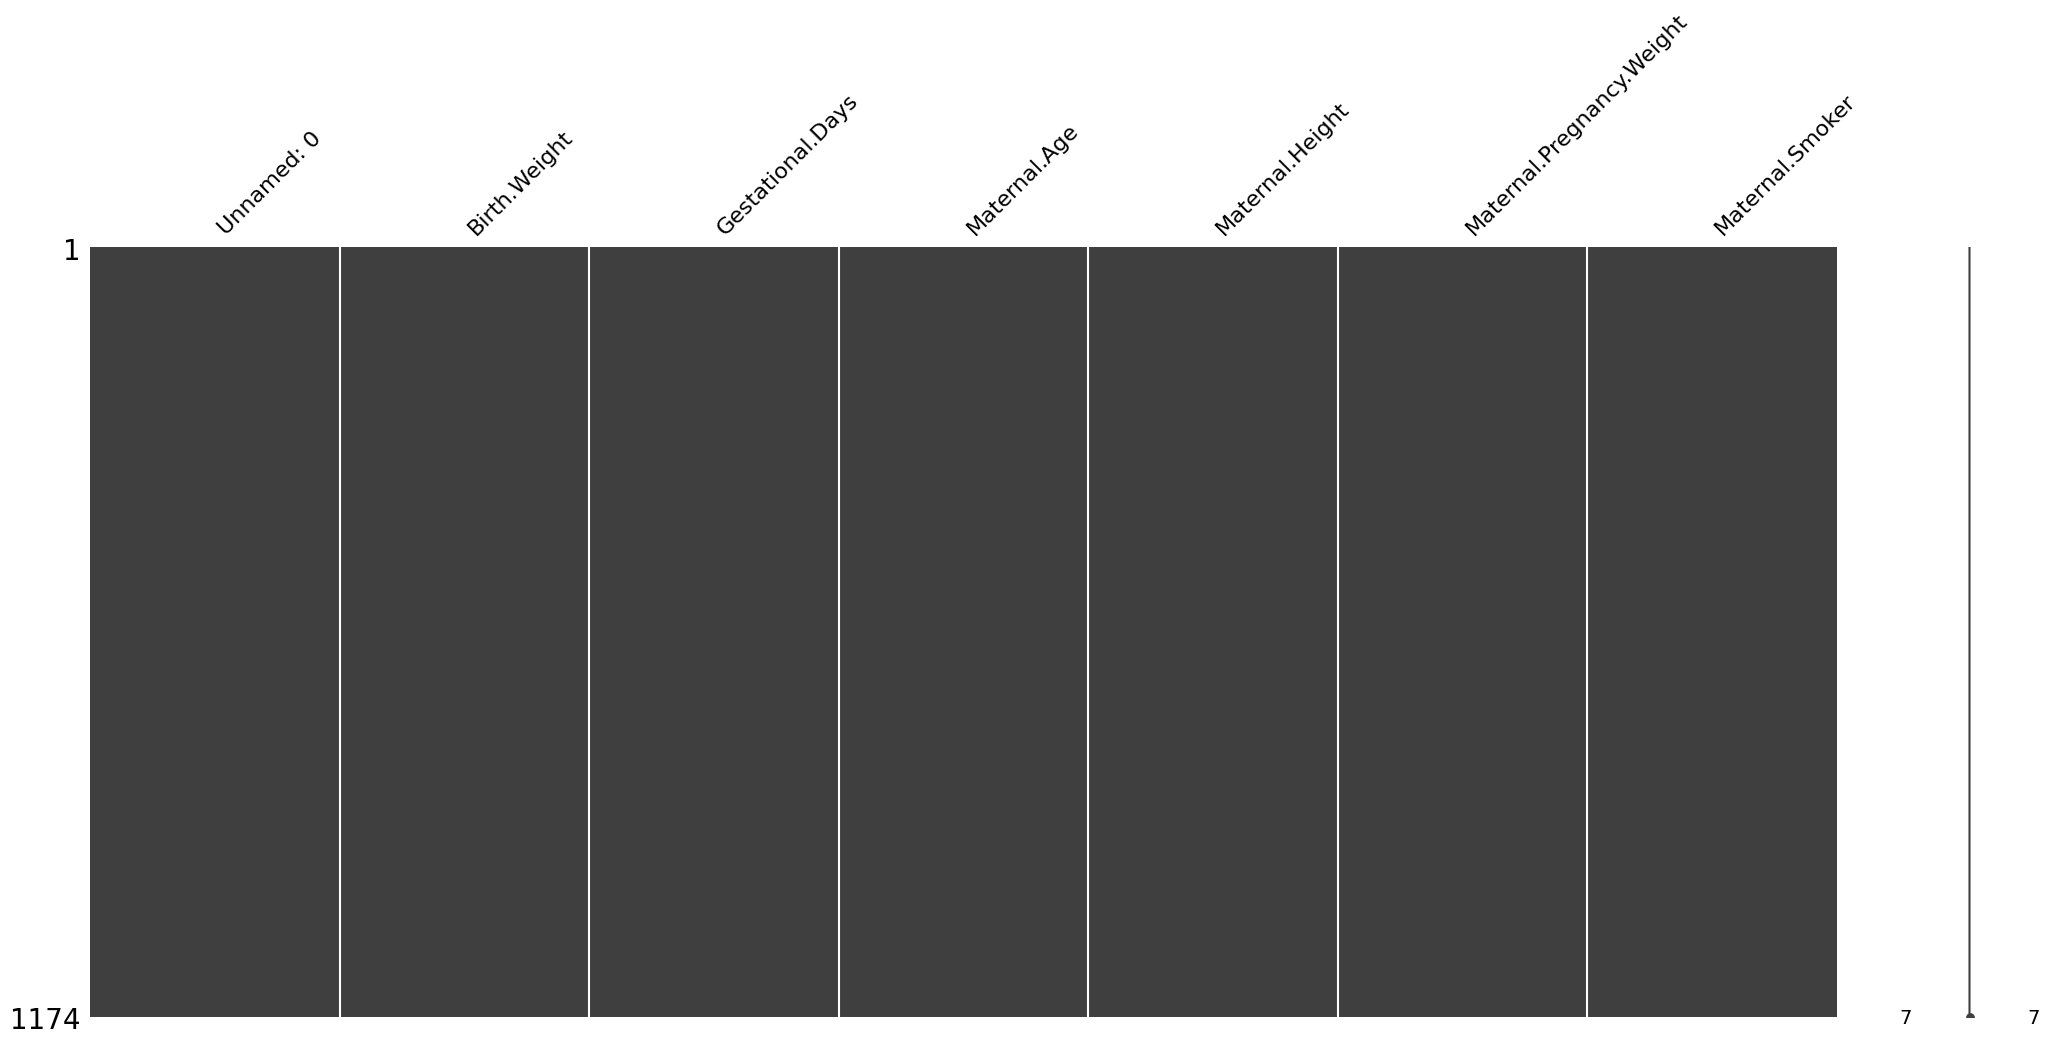

In [92]:
msno.matrix(births_dataset)

#The data has no null values as we observed from the previous cell as well

Univariate Analysis

-Histograms

array([[<Axes: title={'center': 'Birth.Weight'}>,
        <Axes: title={'center': 'Gestational.Days'}>],
       [<Axes: title={'center': 'Maternal.Age'}>,
        <Axes: title={'center': 'Maternal.Height'}>],
       [<Axes: title={'center': 'Maternal.Pregnancy.Weight'}>, <Axes: >]],
      dtype=object)

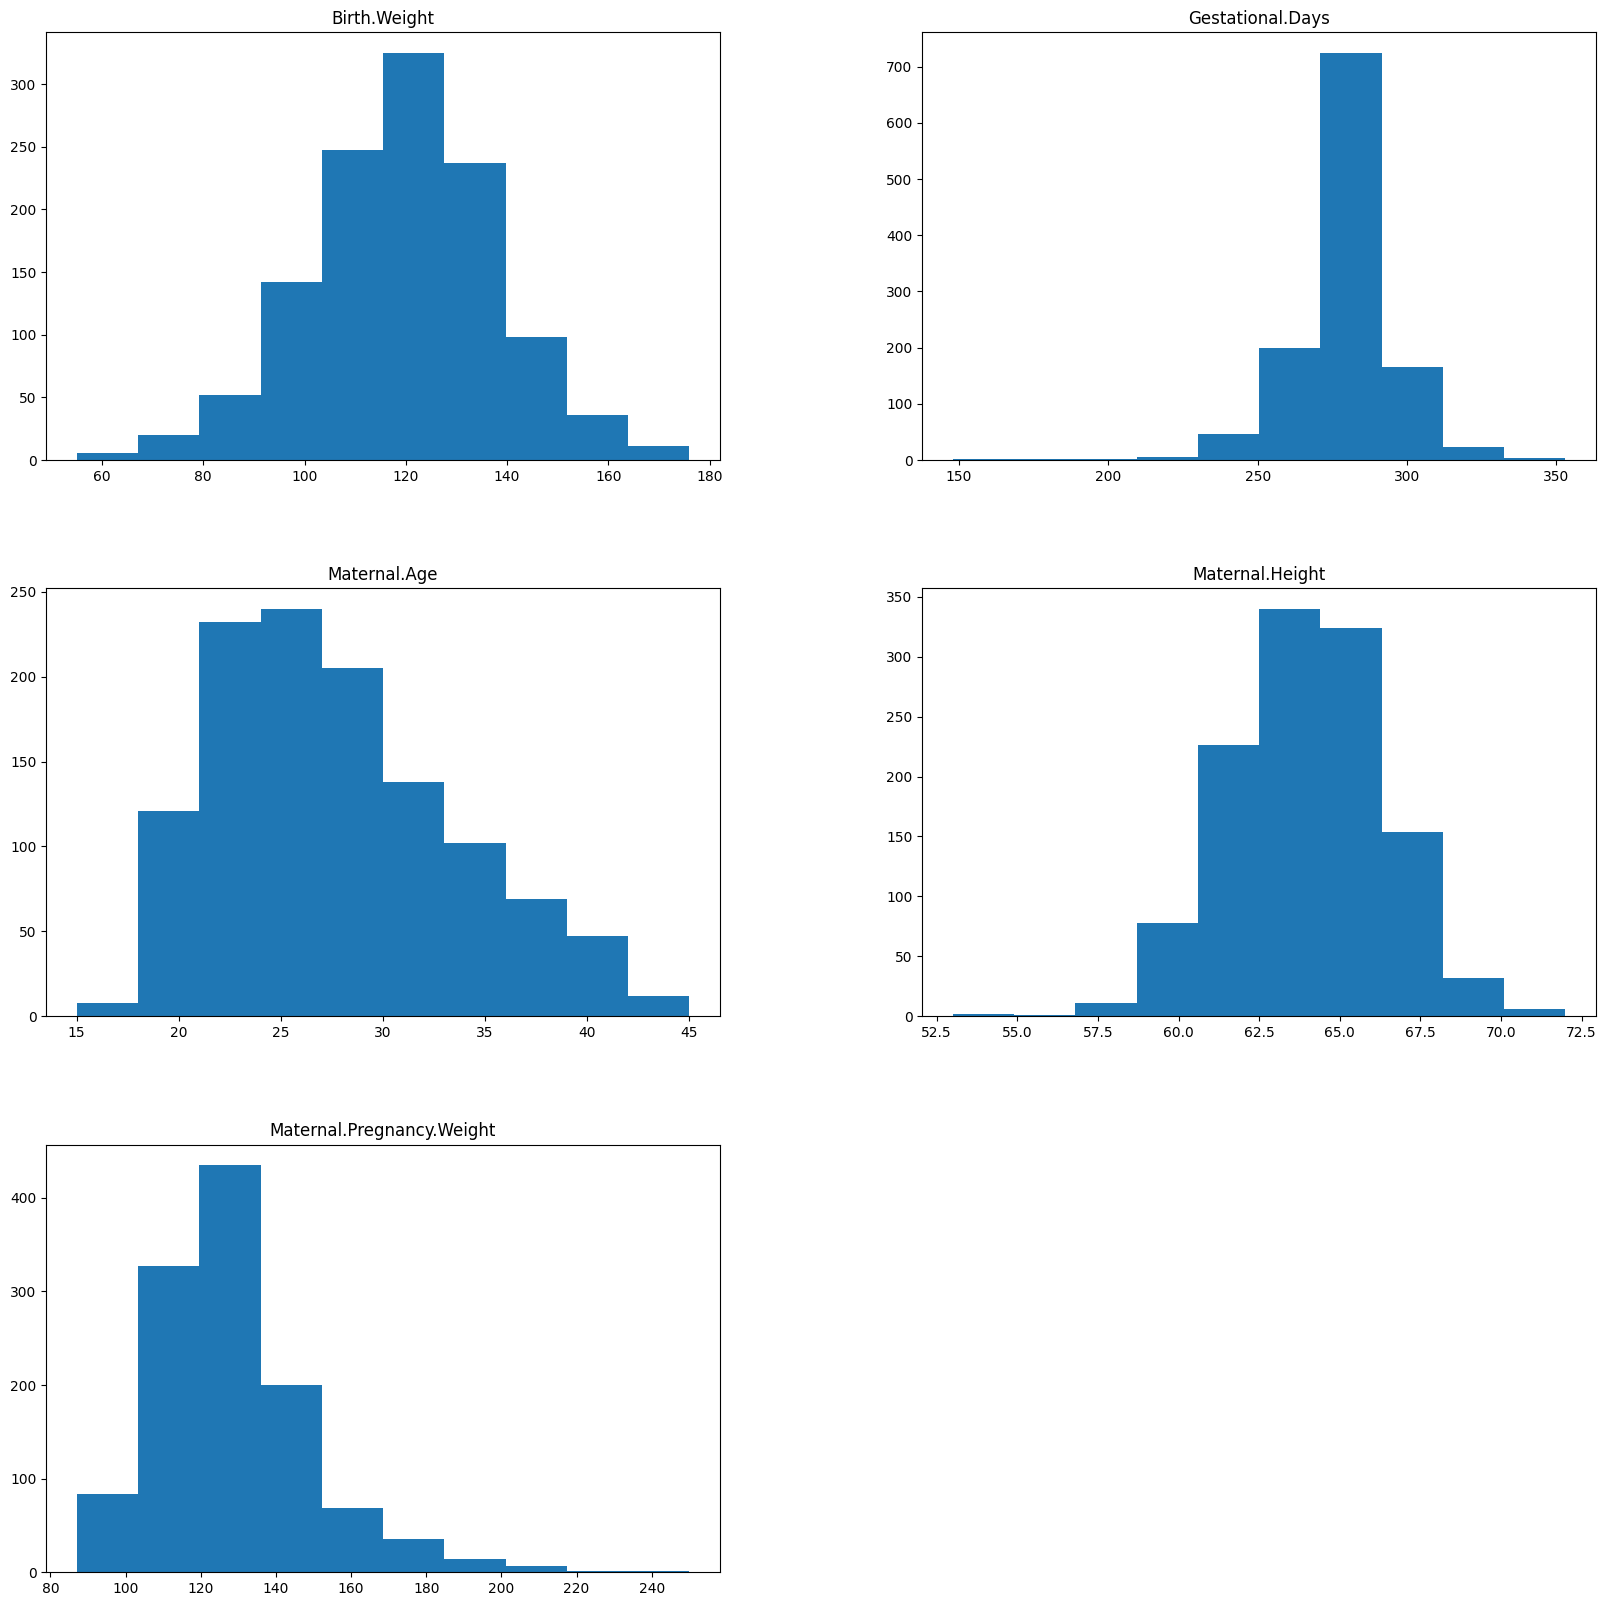

In [95]:
births_dataset_indexcol_removed.hist(figsize=(20,20),grid=False)

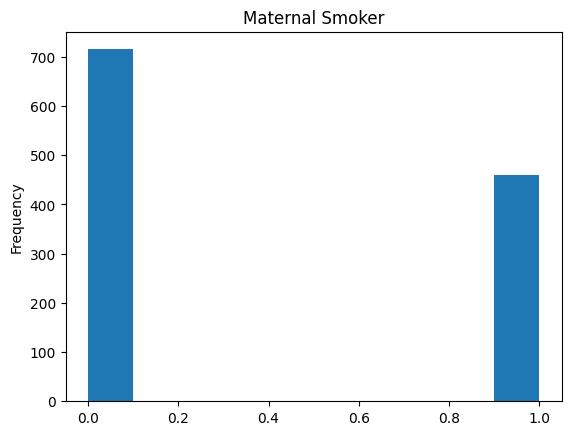

In [134]:
plt = births_dataset_indexcol_removed['Maternal.Smoker'].astype(np.int32).plot(kind = "hist", grid = False, title="Maternal Smoker")
# {0:False, 1:True}

-Violin Plot


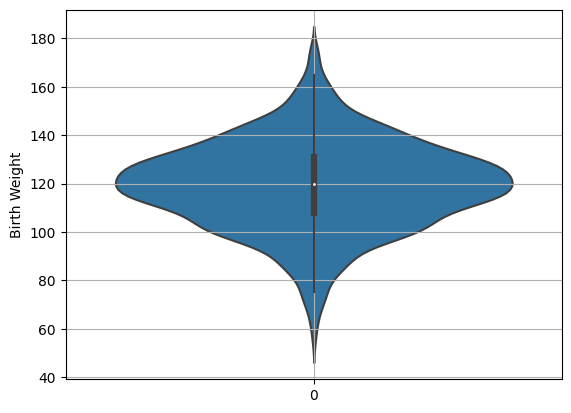

In [138]:
plt = sb.violinplot(births_dataset["Birth.Weight"])
plt.set_ylabel("Birth Weight")
plt.grid()
#The data seems to be concentrated between 100 to 140. 
#Not too many outliers

[(150.0, 350.0)]

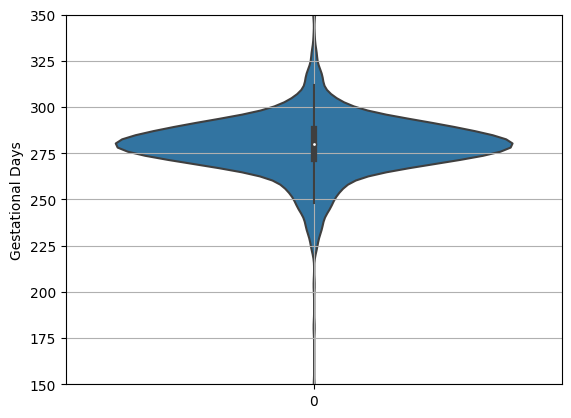

In [143]:
plt = sb.violinplot(births_dataset["Gestational.Days"])
plt.set_ylabel("Gestational Days")
plt.grid()
plt.set(ylim=(150, 350))

#Most of the data lies between 260 - 300
#Has outliers in the lower end of the dataset


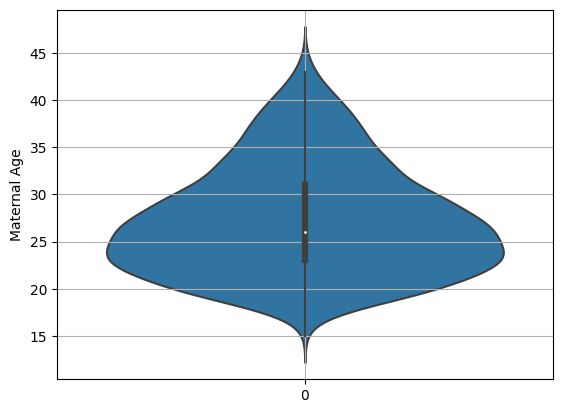

In [144]:
plt = sb.violinplot(births_dataset["Maternal.Age"])
plt.set_ylabel("Maternal Age")
plt.grid()

#The data has good distribution but highest density is between 20 - 30
#Doesnt seem to have alot of outliers

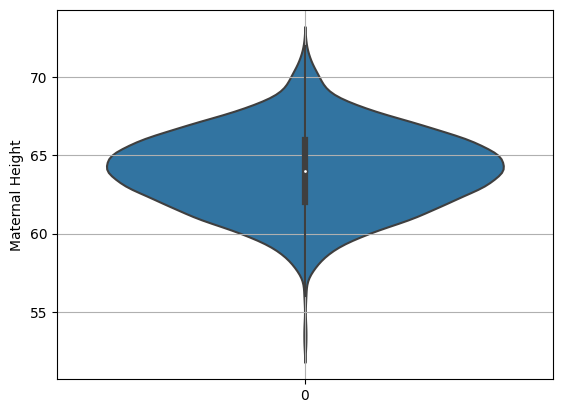

In [149]:
plt = sb.violinplot(births_dataset["Maternal.Height"])
plt.set_ylabel("Maternal Height")
plt.grid()

#Most of the data is concentrated betwwen 60 - ~67
#Has outliers in lower end of dataset


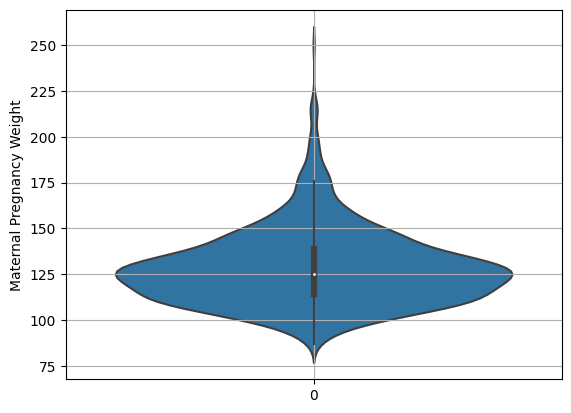

In [150]:
plt = sb.violinplot(births_dataset["Maternal.Pregnancy.Weight"])
plt.set_ylabel("Maternal Pregnancy Weight")
plt.grid()

#Most data betwwe 100 - 150
#Has outliers in upper end of dataset


Text(0, 0.5, 'Maternal Smoker')

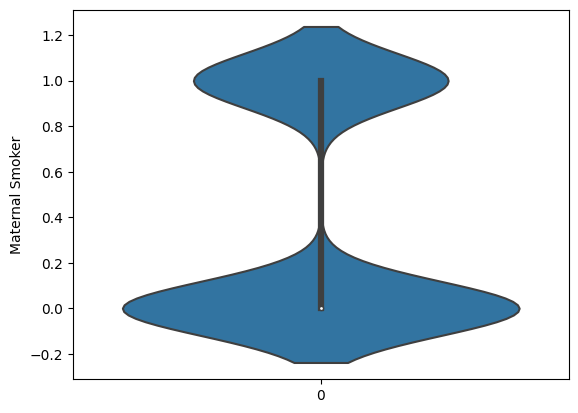

In [51]:
plt = sb.violinplot(births_dataset["Maternal.Smoker"])
plt.set_ylabel("Maternal Smoker")

#Data is categorical (1 and 0 i.e True and False)


-Rug + Density plots

<Axes: xlabel='Birth.Weight', ylabel='Density'>

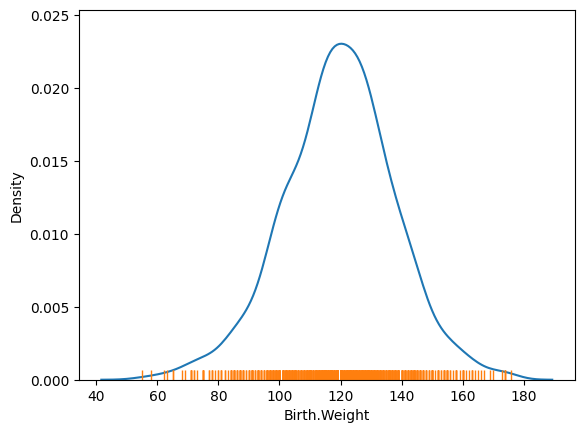

In [53]:
sb.kdeplot(data=births_dataset["Birth.Weight"])
sb.rugplot(data=births_dataset["Birth.Weight"])

<Axes: xlabel='Gestational.Days', ylabel='Density'>

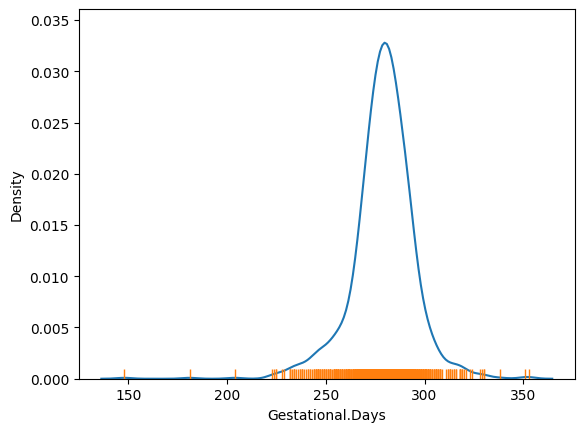

In [54]:
sb.kdeplot(data=births_dataset["Gestational.Days"])
sb.rugplot(data=births_dataset["Gestational.Days"])

<Axes: xlabel='Maternal.Age', ylabel='Density'>

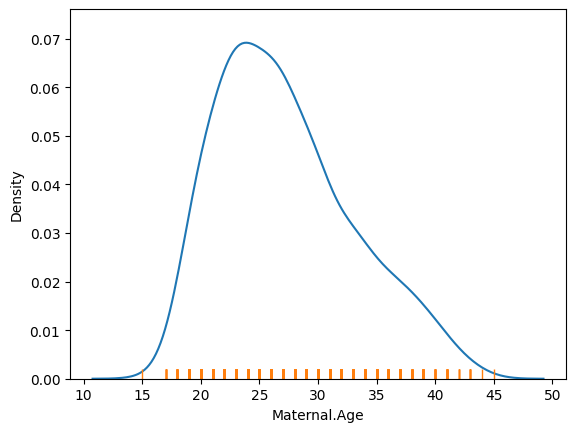

In [55]:
sb.kdeplot(data=births_dataset["Maternal.Age"])
sb.rugplot(data=births_dataset["Maternal.Age"])

<Axes: xlabel='Maternal.Height', ylabel='Density'>

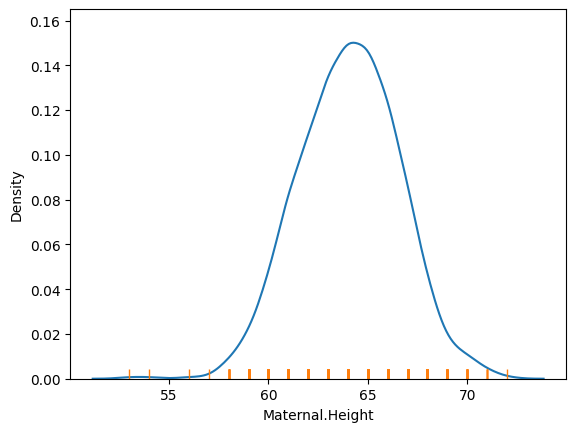

In [56]:
sb.kdeplot(data=births_dataset["Maternal.Height"])
sb.rugplot(data=births_dataset["Maternal.Height"])

<Axes: xlabel='Maternal.Pregnancy.Weight', ylabel='Density'>

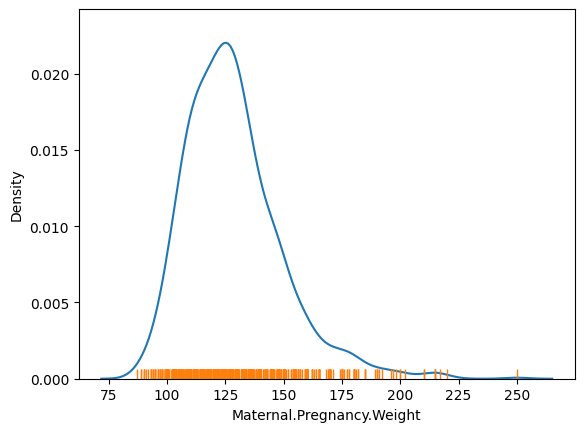

In [57]:
sb.kdeplot(data=births_dataset["Maternal.Pregnancy.Weight"])
sb.rugplot(data=births_dataset["Maternal.Pregnancy.Weight"])

<Axes: xlabel='Maternal.Smoker', ylabel='Density'>

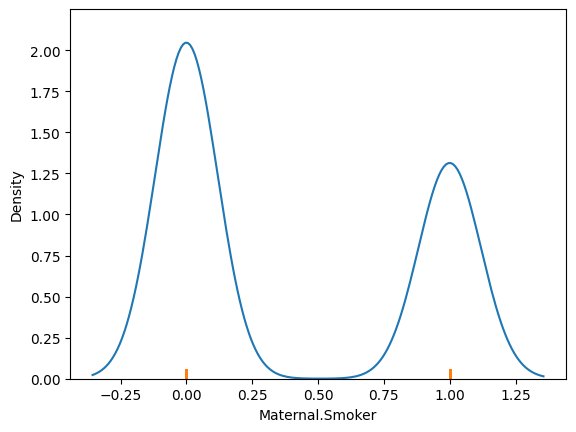

In [58]:
sb.kdeplot(data=births_dataset["Maternal.Smoker"])
sb.rugplot(data=births_dataset["Maternal.Smoker"])

Bivariate Analysis

-Scatter Plots

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


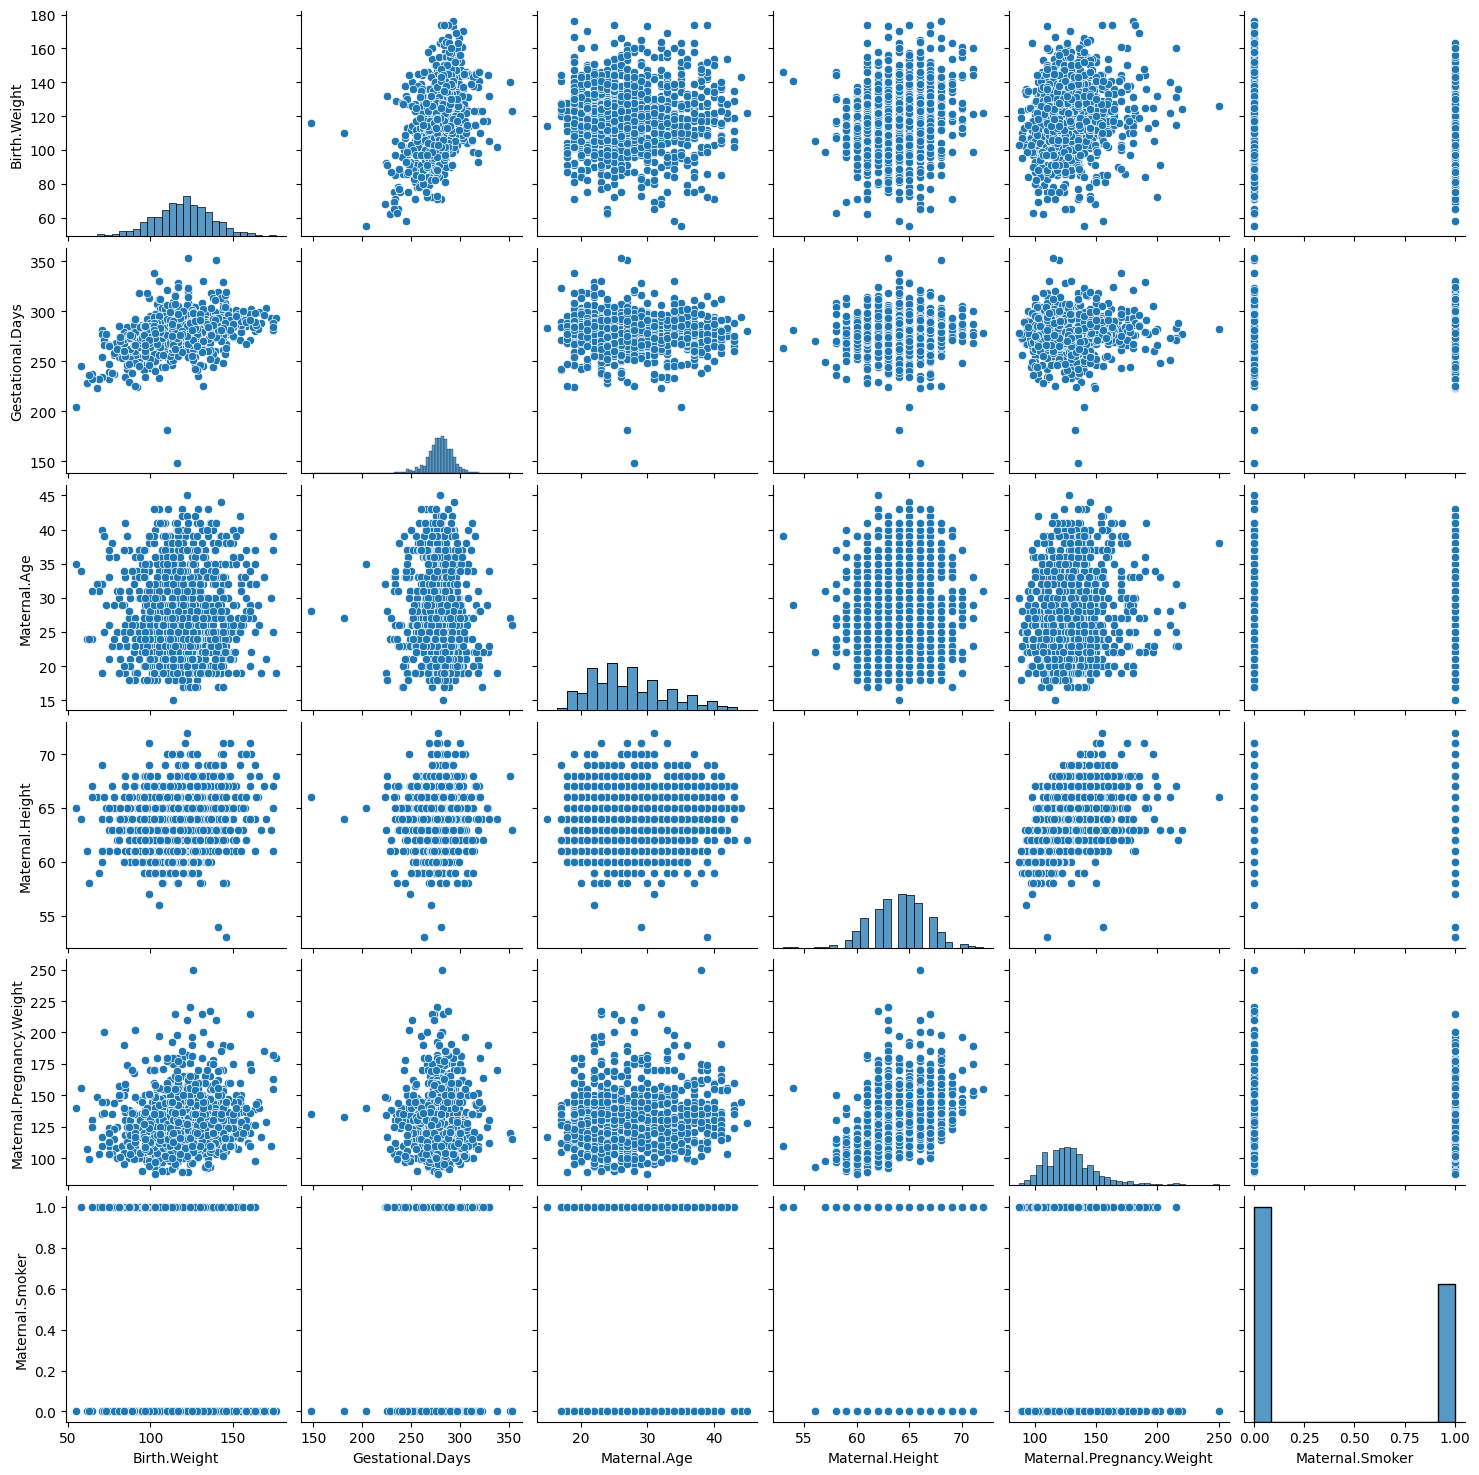

In [151]:
sb.pairplot(births_dataset.iloc[: , 1:],kind="scatter")

#The correaltion between each feature can be observed

-Density Plots

<Axes: ylabel='Density'>

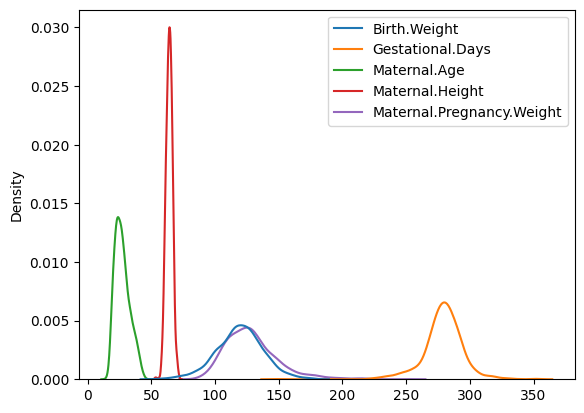

In [124]:
sb.kdeplot(births_dataset.iloc[: , 1:6])
#Removed Maternal.Smoker as it was making the rest of the data unreadble

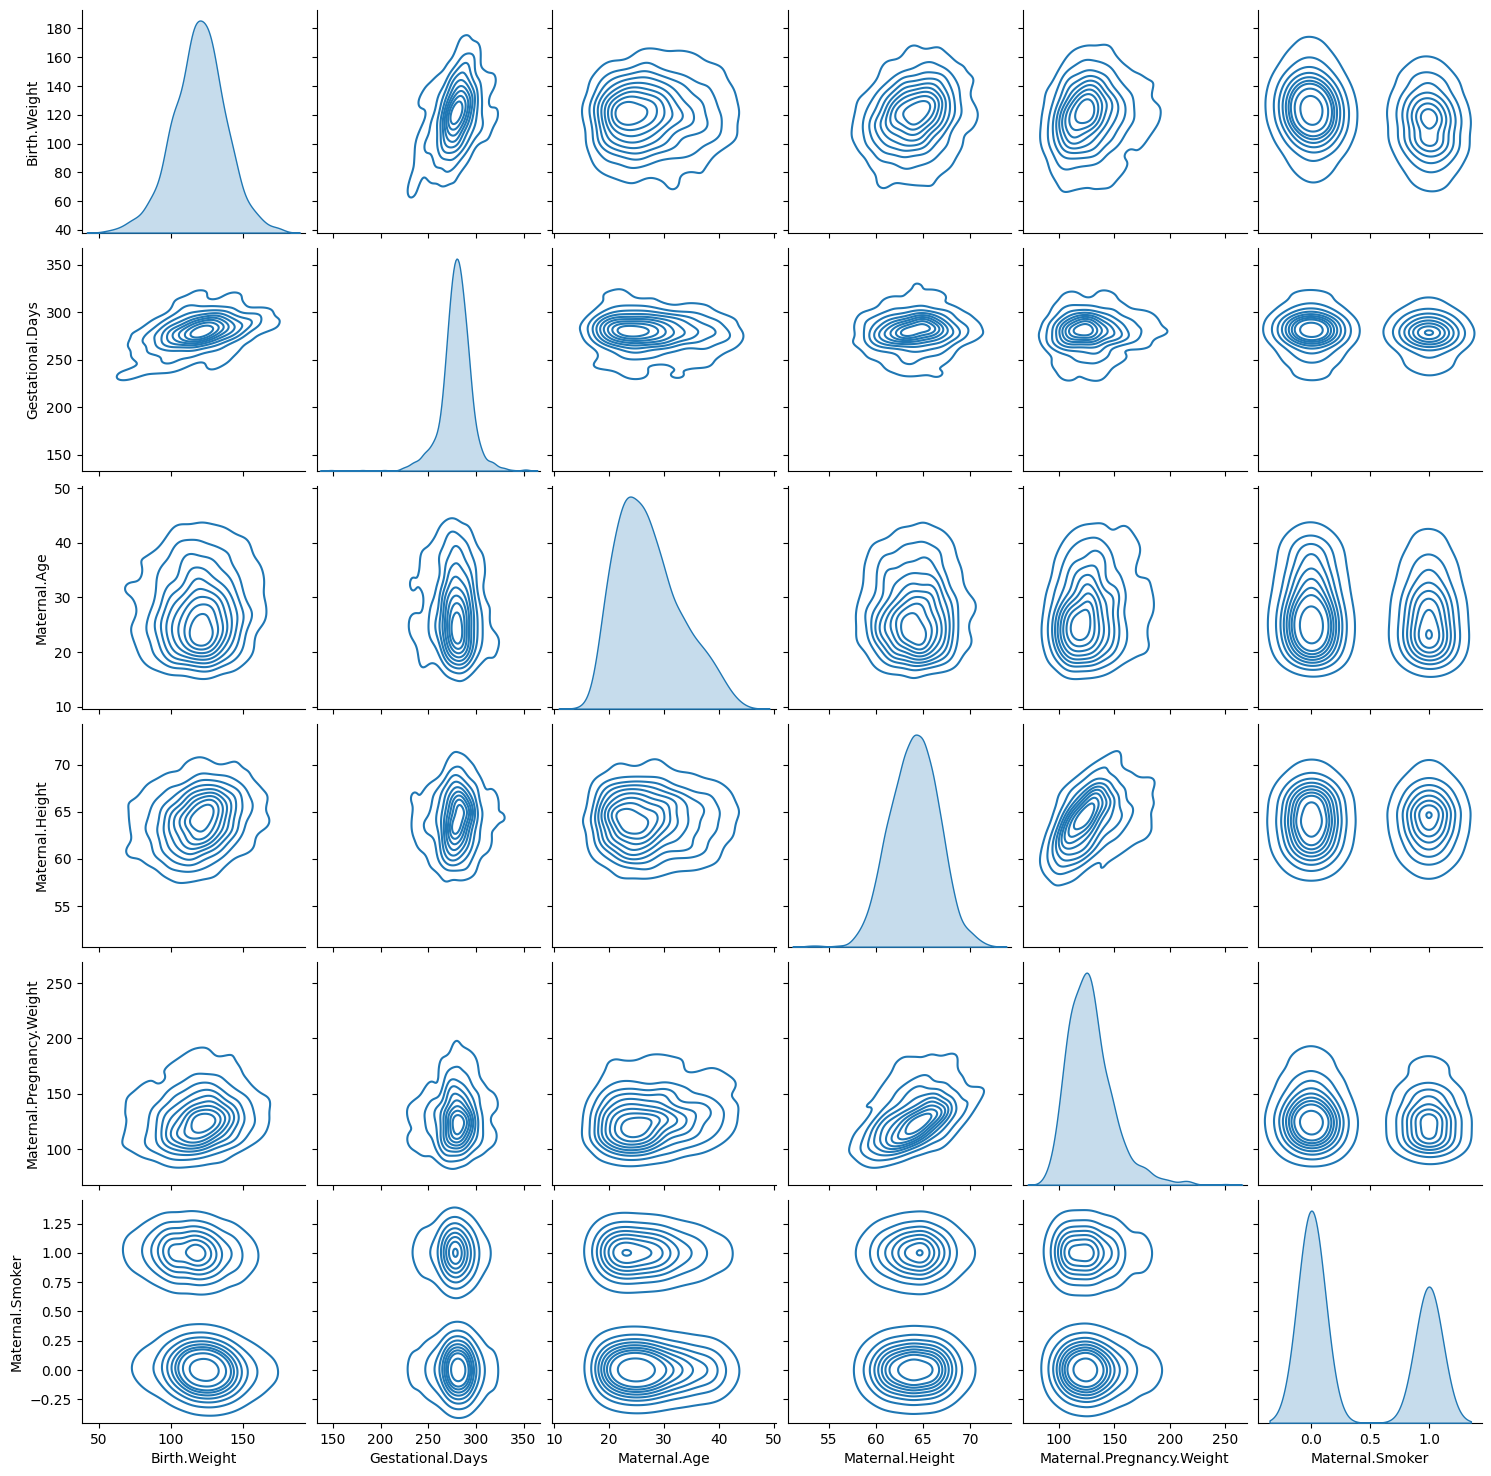

In [77]:
sb.pairplot(births_dataset.iloc[: , 1:],kind="kde")


Box Plot

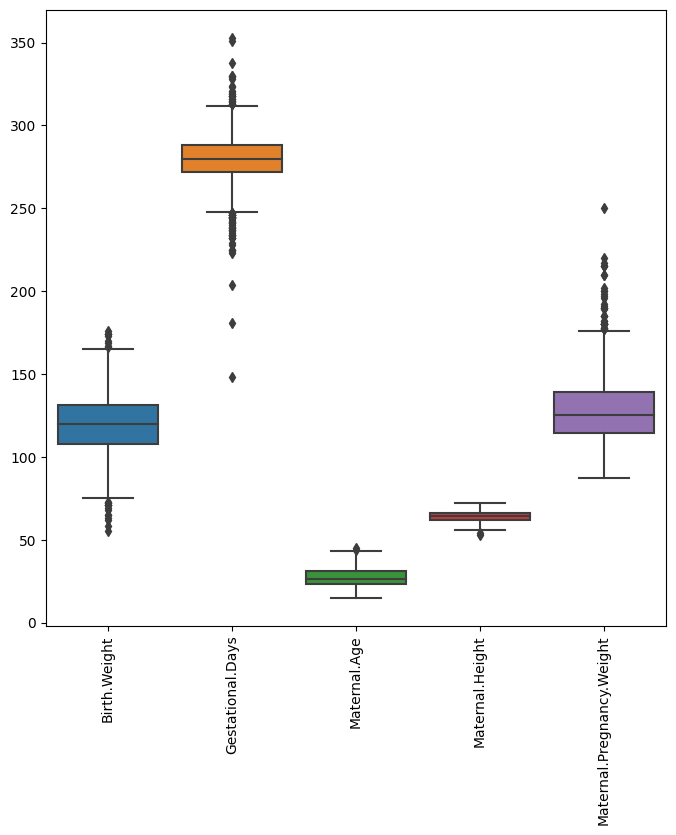

In [132]:
fig, ax = matplt.subplots(1, figsize=(8, 8))
sb.boxplot(births_dataset.iloc[: , 1:6])
matplt.xticks(rotation = 90)
matplt.show()

#Skipped Maternal.Smoker as it is categorical